In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.colors as colors
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [70]:
import pandas as pd
df = pd.read_excel('./rankdata.xlsm')
pd.set_option('display.max_rows', None)

In [71]:
mean = df['avg'].mean()
df.fillna(mean, inplace = True)

In [72]:
def ai_avg(x):
    en = x['english'] * 1
    math = x['math'] * 2
    signal = x['signal'] * 3
    ai = x['ai'] * 4
    logic = x['logic'] * 2
    os = x['os'] * 3
    
    return (en + math + signal + ai + logic + os) / 15
    
    
def network_avg(x):
    en = x['english'] * 1
    math = x['math'] * 2
    signal = x['signal'] * 2
    ai = x['ai'] * 3
    logic = x['logic'] * 3
    os = x['os'] * 4
    
    return (en + math + signal + ai + logic + os) / 15 

def logic_avg(x):
    en = x['english'] * 1
    math = x['math'] * 2
    signal = x['signal'] * 2
    ai = x['ai'] * 3
    logic = x['logic'] * 4
    os = x['os'] * 3
    
    return (en + math + signal + ai + logic + os) / 15

def software_avg(x):
    en = x['english'] * 1
    math = x['math'] * 2
    signal = x['signal'] * 2
    ai = x['ai'] * 4
    logic = x['logic'] * 3
    os = x['os'] * 3
    
    return (en + math + signal + ai + logic + os) / 15

In [73]:
df['ai_avg'] = df.apply(ai_avg,axis=1)
df['network_avg'] = df.apply(network_avg,axis=1)
df['logic_avg'] = df.apply(logic_avg,axis=1)
df['software_avg'] = df.apply(software_avg,axis=1)

In [74]:
df

,software rank,logic rank,ai rank,network rank,avg,os,logic,ai,signal,math,english,ai_avg,network_avg,logic_avg,software_avg
0,2,2,2,2,18.780000,33.33,50.00,73.33,55.56,45.00,82.22,55.480667,52.443333,53.554667,55.110000
1,6,6,7,4,16.780000,49.12,25.00,46.67,25.93,63.33,87.78,45.084667,45.186000,43.578000,45.022667
2,9,9,9,11,20.000000,31.58,63.33,43.33,48.15,31.67,0.00,40.167333,40.396000,42.512667,41.179333
3,11,8,11,8,18.370000,47.37,65.00,38.33,33.33,10.00,60.00,40.361333,43.075333,44.250667,42.472667
4,13,15,14,15,18.090000,43.86,58.33,55.00,44.44,0.00,2.22,40.252000,40.435333,41.400000,41.178000
5,17,13,15,17,17.194497,28.07,68.33,30.00,55.56,33.33,17.78,39.466000,40.188667,42.872667,40.317333
6,15,14,17,12,15.540000,43.86,63.33,38.33,37.04,20.00,52.22,40.993333,43.114667,44.412667,42.746000
7,20,20,20,21,17.890000,35.09,53.33,45.00,44.44,15.00,28.89,38.942667,38.874667,40.090667,39.535333
8,32,35,24,31,17.194497,33.33,38.33,43.33,62.96,3.33,0.00,36.367333,34.058667,34.392000,34.725333
9,25,24,26,23,18.920000,33.33,53.33,45.00,29.63,13.33,37.78,35.998667,36.800667,38.134000,37.578667


In [107]:
# from sklearn.model_selection import train_test_split

# train, test = train_test_split(df, test_size=0.1, shuffle=True)

# x_train = train[['avg', 'ai_avg']]
# y_train = train[['ai rank']]
# x_test = test[['avg', 'ai_avg']]
# y_test = test[['ai rank']]

In [134]:
x_train_ai = df[['avg', 'ai_avg']]
y_train_ai = df[['ai rank']]

x_train_software = df[['avg', 'software_avg']]
y_train_software = df[['software rank']]

x_train_logic = df[['avg', 'logic_avg']]
y_train_logic = df[['logic rank']]

x_train_network = df[['avg', 'network_avg']]
y_train_network = df[['network rank']]

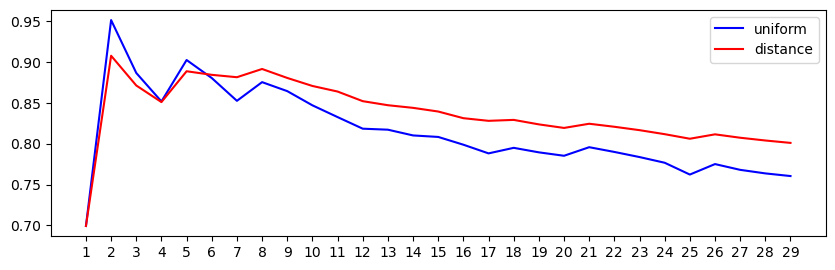

In [137]:
uniform  = []
distance = []
r = range (1,30,1)

for k in r:
    
    # Euclidan, 'straight' distance
    model = KNeighborsRegressor(n_neighbors = k, weights='uniform')
    model.fit(x_train.values, y_train.values)
    uniform.append(model.score(x_test.values,y_test.values))

    # Distance is inversely proportional (to lessen the weight of outliers)
    model = KNeighborsRegressor(n_neighbors = k, weights='distance') 
    model.fit(x_train.values, y_train.values)
    distance.append(model.score(x_test.values,y_test.values))

uniform = np.array(uniform)
distance = np.array(distance)

plt.rcParams['figure.figsize'] = [10, 3]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.plot(r,uniform,label='uniform',color='blue')
plt.plot(r,distance,label='distance',color='red')
plt.legend()
plt.gca().set_xticks(r)
plt.show()

In [138]:
software_model = KNeighborsRegressor(n_neighbors = 11, weights='distance') 
software_model.fit(x_train_software.values, y_train_software.values)

ai_model = KNeighborsRegressor(n_neighbors = 11, weights='distance') 
ai_model.fit(x_train_ai.values, y_train_ai.values)

logic_model = KNeighborsRegressor(n_neighbors = 11, weights='distance') 
logic_model.fit(x_train_logic.values, y_train_logic.values)

network_model = KNeighborsRegressor(n_neighbors = 11, weights='distance') 
network_model.fit(x_train_network.values, y_train_network.values)


# score = model.score(x_test.values,y_test.values)

In [31]:
# model = KNeighborsRegressor(n_neighbors = 11, weights='uniform')
# model.fit(x_train.values, y_train.values)
# score = model.score(x_test.values,y_test.values)

In [ ]:
# model.predict(x_test)

In [123]:
model.predict(pd.DataFrame({'avg':[15, 20, 10, 18], 'ai_avg': [31, 50,40,10]}))

array([[  86.72143262],
       [   7.60914106],
       [  27.73886364],
       [1260.77147489]])

In [132]:
model.predict([[20,21]])

array([[238.79402688]])

In [140]:
import pickle

# save model
pickle.dump(software_model, open("software_model.pickle", "wb"))
pickle.dump(ai_model, open("ai_model.pickle", "wb"))
pickle.dump(logic_model, open("logic_model.pickle", "wb"))
pickle.dump(network_model, open("network_model.pickle", "wb"))

# load model
filename = "software_model.pickle"
loaded_model = pickle.load(open(filename, "rb"))

In [141]:
loaded_model.predict([[18.92,40.5]])

array([[14.36767077]])